<a href="https://colab.research.google.com/github/captain-khuman/music-recommendation-system/blob/main/music_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


In [ ]:
tracks = pd.read_csv('musicrecords.csv')
tracks2 = pd.read_csv('musicrecords.csv')
tracks.head()


,id,name,artists,genres,release_years,duration_s,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,1,Sunrise,Norah Jones,adult standards,2004,201,71,53,30,-14,3,94,11,68,157
1,2,Black Night,Deep Purple,album rock,2000,207,39,50,79,-11,7,17,17,81,135
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,341,69,66,69,-9,17,2,7,52,168
3,4,The Pretender,Foo Fighters,alternative metal,2007,269,76,43,96,-4,4,0,3,37,173
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,256,59,58,82,-5,3,1,10,87,106


In [ ]:
tracks.shape


(1994, 15)

In [ ]:
tracks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1994 non-null   int64 
 1   name           1994 non-null   object
 2   artists        1994 non-null   object
 3   genres         1994 non-null   object
 4   release_years  1994 non-null   int64 
 5   duration_s     1994 non-null   object
 6   popularity     1994 non-null   int64 
 7   danceability   1994 non-null   int64 
 8   energy         1994 non-null   int64 
 9   loudness       1994 non-null   int64 
 10  speechiness    1994 non-null   int64 
 11  acousticness   1994 non-null   int64 
 12  liveness       1994 non-null   int64 
 13  valence        1994 non-null   int64 
 14  tempo          1994 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 233.8+ KB


In [ ]:
tracks.isnull().sum()


id               0
name             0
artists          0
genres           0
release_years    0
duration_s       0
popularity       0
danceability     0
energy           0
loudness         0
speechiness      0
acousticness     0
liveness         0
valence          0
tempo            0
dtype: int64

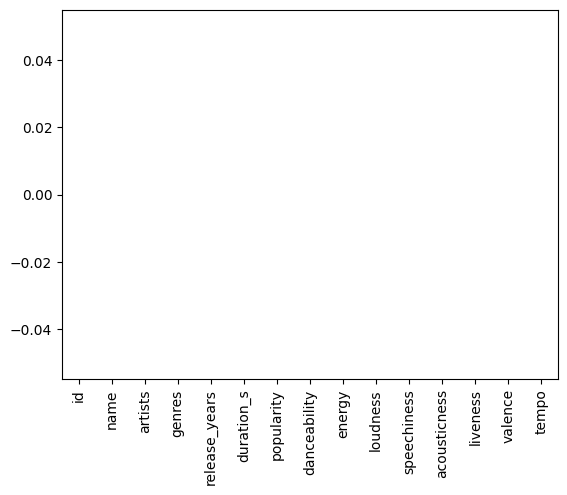

In [ ]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()


In [ ]:
tracks.drop(tracks.iloc[:, 0:1], inplace=True, axis=1)
tracks2.drop(tracks2.iloc[:, 0:4], inplace =True,axis=1)

In [ ]:
tracks.info()
tracks2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1994 non-null   object
 1   artists        1994 non-null   object
 2   genres         1994 non-null   object
 3   release_years  1994 non-null   int64 
 4   duration_s     1994 non-null   object
 5   popularity     1994 non-null   int64 
 6   danceability   1994 non-null   int64 
 7   energy         1994 non-null   int64 
 8   loudness       1994 non-null   int64 
 9   speechiness    1994 non-null   int64 
 10  acousticness   1994 non-null   int64 
 11  liveness       1994 non-null   int64 
 12  valence        1994 non-null   int64 
 13  tempo          1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
--

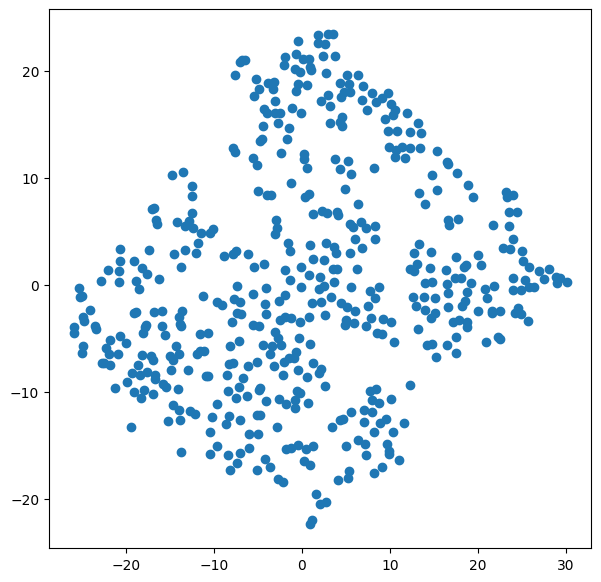

In [ ]:
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(tracks2.head(500))
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()





In [ ]:
tracks['name'].nunique(), tracks.shape


(1958, (1994, 14))

In [ ]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['name'], keep='first', inplace=True)


In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 793 to 1793
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1958 non-null   object
 1   artists        1958 non-null   object
 2   genres         1958 non-null   object
 3   release_years  1958 non-null   int64 
 4   duration_s     1958 non-null   object
 5   popularity     1958 non-null   int64 
 6   danceability   1958 non-null   int64 
 7   energy         1958 non-null   int64 
 8   loudness       1958 non-null   int64 
 9   speechiness    1958 non-null   int64 
 10  acousticness   1958 non-null   int64 
 11  liveness       1958 non-null   int64 
 12  valence        1958 non-null   int64 
 13  tempo          1958 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 229.5+ KB


In [ ]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['genres'])


In [ ]:
def get_similarities(song_name, data):

# Getting vector for the input song.
		text_array1 = song_vectorizer.transform(data[data['name']==song_name]['genres']).toarray()
		num_array1 = data[data['name']==song_name].select_dtypes(include=np.number).to_numpy()

		# We will store similarity for each row of the dataset.
		sim = []
		for idx, row in data.iterrows():
			name = row['name']

			# Getting vector for current song.
			text_array2 = song_vectorizer.transform(data[data['name']==name]['genres']).toarray()
			num_array2 = data[data['name']==name].select_dtypes(include=np.number).to_numpy()

			# Calculating similarities for text as well as numeric features
			text_sim = cosine_similarity(text_array1, text_array2)[0][0]
			num_sim = cosine_similarity(num_array1, num_array2)[0][0]
			sim.append(text_sim + num_sim)

		return sim


In [ ]:
def recommend_songs(song_name, data=tracks):
  # Base case
  if tracks[tracks['name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')

    for song in data.sample(n=7)['name'].values:
      print(song)
    return

  data['similarity_factor'] = get_similarities(song_name, data)

  data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)

  # First song will be the input song itself as the similarity will be highest.
  display(data[['name', 'artists']][2:9])

In [ ]:

recommend_songs('Despacito')

,name,artists
63,Me Gustas Tu,Manu Chao
1730,Chan Chan,Buena Vista Social Club
572,"Happy - From ""Despicable Me 2""",Pharrell Williams
1955,Bad Moon Rising,Creedence Clearwater Revival
1241,I'm Still Standing,Elton John
110,Waiting On the World to Change,John Mayer
1837,I Saw Her Standing There - Remastered 2009,The Beatles
